# 📊 프로젝트 메인 Task 정리

파일: `Final Results Extended little.csv`

---

## 📝 현재 설정한 메인 Task

1. **생산량 예측 (c_TotalProducts)**
   * 전체 컬럼 기반
   * 공정 단계별 (Blanking → Press → Assembly Cell → Paint → Quality → Warehouse)
   * SKU별 (SKU1~4)

2. **병목 구간 예측**
   * 특정 일자·SKU·라인에서 병목이 어디서 발생하는지

3. **SKU별 리드타임 분석**
   * SKU별 리드타임의 일자 단위 분포/패턴 확인

---

## 💡 보완/추가 아이디어

1. **생산량 예측**
   * 단계별 모델링은 좋은데, *"quality 이후 scrap/rework"* 이 반영되는지 확인하면 더 설득력 있음.  
     → 예: Σ(Cell×SKU) vs. c_TotalProducts의 차이가 scrap률에 해당한다는 분석(이미 확인한 부분 활용).
   * SKU별 예측 시, SKU 간 feature importance 비교 → 어떤 공정이 어떤 SKU에 민감한지 파악 가능.

2. **병목 구간 예측**
   * 단순히 "병목 위치"만 분류하는 게 아니라,  
     → 병목이 전체 생산량에 끼치는 영향(%) 예측  
     → Queue vs Utilization 조합으로 병목 패턴 클러스터링  
     하면 더 인사이트가 커집니다.
   * Reinforcement Learning / 시뮬레이션 기반 최적화로 확장도 가능.

3. **리드타임 분석**
   * SKU별 평균 리드타임뿐 아니라, 리드타임 분포(평균·표준편차·outlier)까지 분석.
   * 공정별 대기시간(Queue Time)과 가동률(Utilization)의 영향 분석 → “어떤 조건에서 리드타임이 급격히 길어지는가” 도출.

---

## 📌 추가로 고려하면 좋은 Task

* **불량률 추정 (Scrap/Quality 통과율)**  
  - TotalProducts 대비 각 단계 throughput 비교 → 불량/스크랩 추정치 모델링  
  - 실제 생산 데이터와 유사성을 높일 수 있음

* **설비/라인 효율성 분석**  
  - Utilization·Cycle Time 기반 OEE(설비 종합 효율) 지표화

* **일자 단위 이상치 탐지 (Outlier Detection)**  
  - 시계열의 세밀한 변동(분·시간 단위 spike)은 불가능하지만,  
  - 하루 단위 데이터 기준으로  
    → 이전 일자 대비 급격한 변화율(ΔQueue, ΔUtilization, ΔCycleTime)  
    → 이동평균 대비 편차  
    등을 활용하여 **특정 날짜의 이상치(비정상 패턴)** 탐지 가능

---

## 📖 용어 정리

- **Scrap**: 불량이 발생해 **버려진 제품(폐기)**.  
  → 생산라인 처리량에는 잡히지만, 최종 합격품(c_TotalProducts)에는 포함되지 않음.

- **Rework**: 불량이 났지만 **재작업** 후 다시 공정에 투입된 제품.  
  → Queue/Util 데이터에는 잡히지만, 최종 생산량에는 한 번만 반영됨.

---

👉 정리하면:  
현재 3개 메인 Task는 👍 문제없고, **“병목의 영향도 분석”** + **“불량률 추정”** + **“일자 단위 이상치 탐지”**를 보강하면 발표/리포트에서 더 설득력이 커집니다.

Shape: (132676, 78)
Target: c_TotalProducts
Num features (raw): 77
[INFO] usable rows: 132675, usable features: 55
R2=0.9992 | MAE=22.5871 | RMSE=30.2825


,feature,perm_importance_mean,perm_importance_std
36,Quality_Util,1.830695e+00,1.489510e-02
35,Paint2_Util,1.573039e-03,2.577207e-05
34,Paint1_Util,4.618499e-04,6.770757e-06
37,Quality_Queue,4.606290e-05,6.640191e-06
51,SKU4_VA_Time,4.440721e-05,5.967473e-06
45,SKU2_VA_Time,4.362259e-05,2.653154e-06
42,SKU1_VA_Time,4.121095e-05,2.554518e-06
48,SKU3_VA_Time,3.488709e-05,2.299681e-06
41,Forklift_Assembly_Queue,1.751422e-05,4.348332e-06
21,c_Cycle1,1.444968e-05,2.336258e-06


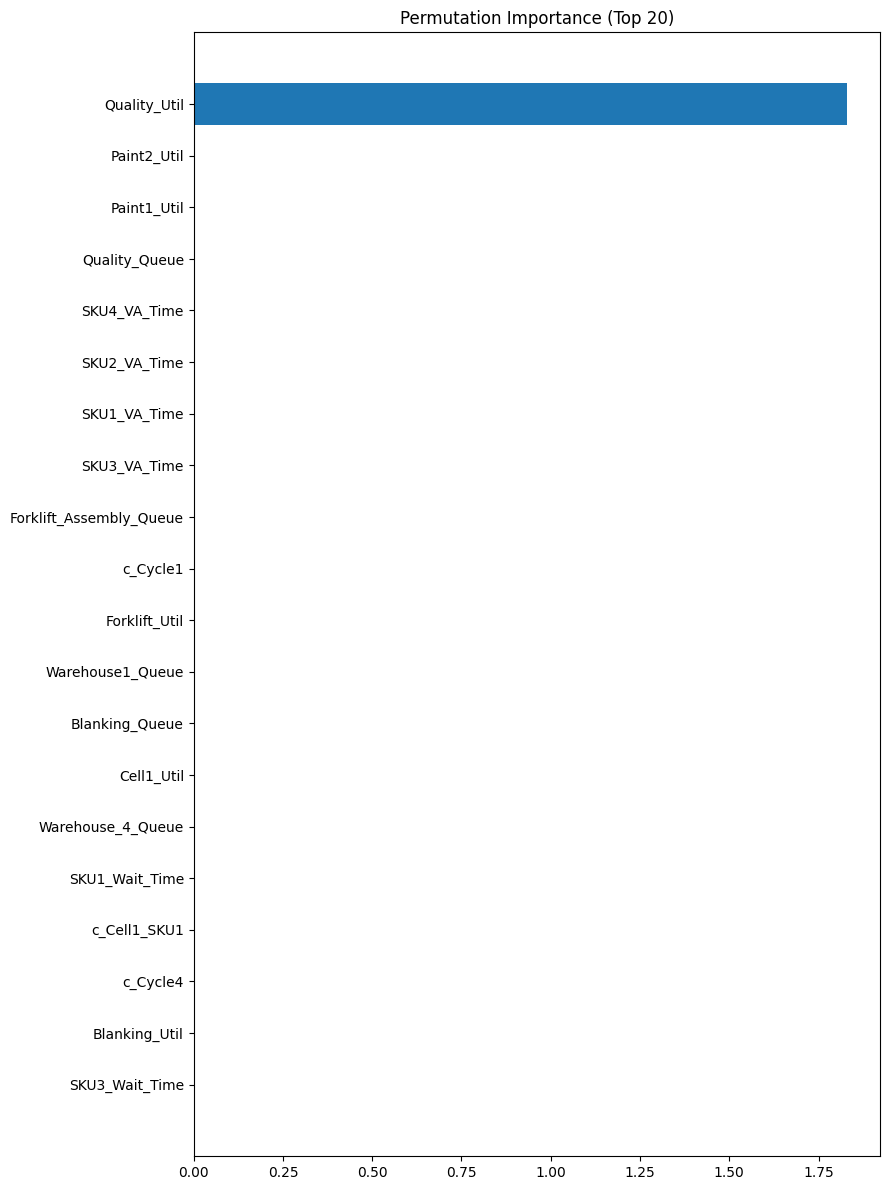

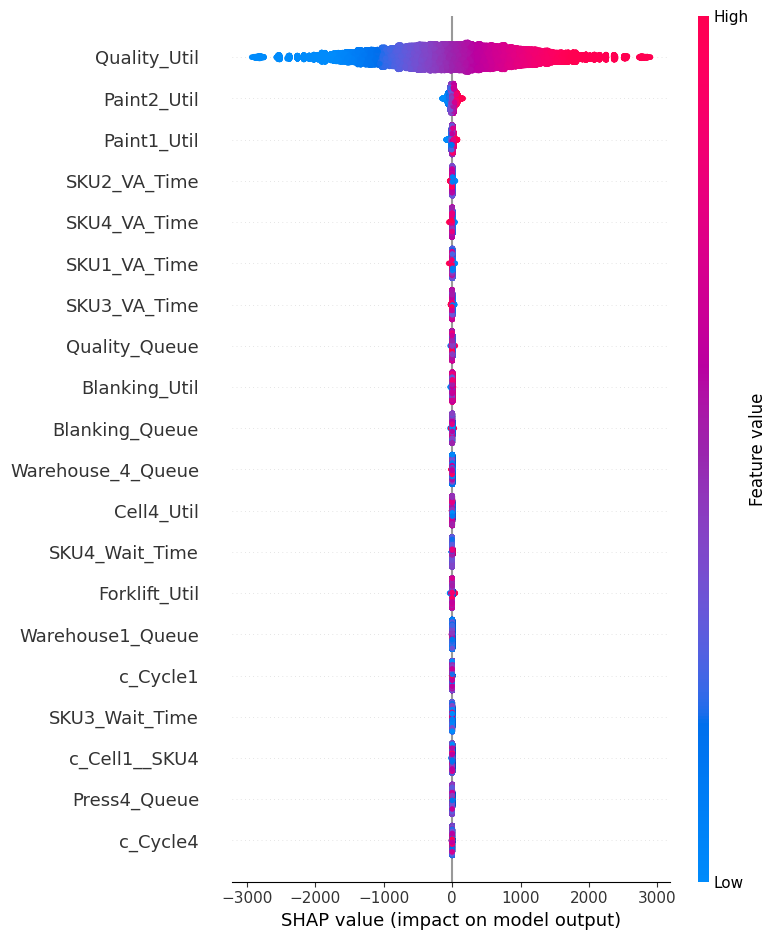

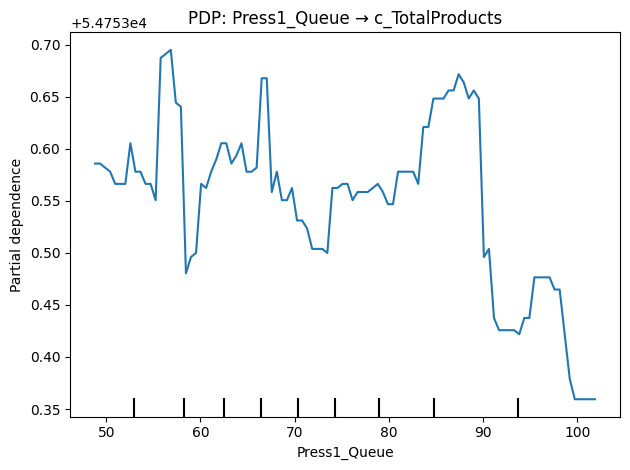

In [6]:
# =====================================================================================
# Factory Data XAI in Jupyter
# - CSV 경로만 지정하면 실행
# - 누수 방지 옵션(leakage_safe=True): 같은 날 Queue/Util 제외, lag1/ma7 피처 생성
# - NaN/Inf/상수 피처 방어
# - Permutation Importance + (가능 시) SHAP + PDP(Press Queue 대표 1개)
# =====================================================================================

import os, re, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# ---- (있으면) XGBoost / SHAP 사용
HAS_XGB = False
try:
    from xgboost import XGBRegressor
    HAS_XGB = True
except Exception:
    pass

HAS_SHAP = False
try:
    import shap
    HAS_SHAP = True
except Exception:
    pass

# =====================================================================================
# 1) 설정: 여기만 필요에 맞게 수정
# =====================================================================================
CSV_PATH    = "Final Results Extended.csv"  # 🔹 CSV 경로
TARGET      = "c_TotalProducts"                    # 🔹 회귀 타겟
DATE_COL    = ""                                   # 🔹 날짜 컬럼명 (예: "Date"); 누수 방지 모드에서 필요
leakage_safe = False                               # 🔹 True: lag/rolling만 사용(동일일자 값 제외)

TEST_SIZE   = 0.2
RANDOM_SEED = 42

# =====================================================================================
# 2) 유틸 함수
# =====================================================================================
def rmse_compat(y, pred):
    return float(np.sqrt(mean_squared_error(y, pred)))

def find_columns(cols, patterns):
    out = []
    for p in patterns:
        rgx = re.compile(p, flags=re.I)
        out.extend([c for c in cols if rgx.search(c)])
    # 중복 제거(순서 보존)
    return list(dict.fromkeys(out))

def build_leakage_safe_frame(df, date_col, queue_cols, util_cols):
    """
    - 날짜 기준 정렬
    - 동일 일자의 Queue/Util을 피처에서 제외하고,
      대신 lag1, ma7 피처 생성
    """
    work = df.copy()
    work[date_col] = pd.to_datetime(work[date_col], errors="coerce")
    work = work.sort_values(date_col).reset_index(drop=True)
    for c in (queue_cols + util_cols):
        work[f"{c}_lag1"] = pd.to_numeric(work[c], errors="coerce").shift(1)
        work[f"{c}_ma7"]  = pd.to_numeric(work[c], errors="coerce").rolling(7, min_periods=1).mean()
    # 동일 일자 값 제거(누수 방지)
    work = work.drop(columns=list(set(queue_cols + util_cols)), errors="ignore")
    return work

# =====================================================================================
# 3) 데이터 로드 & 피처 후보
# =====================================================================================
df = pd.read_csv(CSV_PATH, low_memory=False)
print("Shape:", df.shape)

# 후보: Queue/Util 자동 탐색
queue_cols = find_columns(df.columns, [r"queue"])
util_cols  = find_columns(df.columns, [r"util(ization)?", r"\butil\b"])

if leakage_safe:
    if not DATE_COL or DATE_COL not in df.columns:
        raise ValueError("leakage_safe=True 이면 DATE_COL을 올바르게 지정해야 합니다.")
    df = build_leakage_safe_frame(df, DATE_COL, queue_cols, util_cols)
    candidate_features = [c for c in df.columns if c.endswith("_lag1") or c.endswith("_ma7")]
else:
    # 사후 분석 모드: 같은 날의 수치형 전부(단, 타겟 제외) 허용
    all_numeric = df.select_dtypes(include=[np.number]).columns.tolist()
    # 만약 타겟이 수치형이 아닐 수 있으니, 우선 수치형 변환 후 타겟 제외
    candidate_features = [c for c in all_numeric if c != TARGET]

print("Target:", TARGET)
print("Num features (raw):", len(candidate_features))

# =====================================================================================
# 4) NaN/Inf 방어 + 상수 피처 제거 + 학습/평가
# =====================================================================================
# (1) 타겟/피처 숫자화
df[TARGET] = pd.to_numeric(df[TARGET], errors="coerce")
X = df[candidate_features].apply(pd.to_numeric, errors="coerce")

# (2) 타겟 NaN 행 제거
mask = ~df[TARGET].isna()
X = X.loc[mask].copy()
y = df.loc[mask, TARGET].astype(float).copy()

# (3) 피처 NaN/Inf 처리 + 상수 피처 제거
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))

desc = X.describe().T
keep_cols = desc.index[desc["std"].fillna(0) > 0].tolist()
X = X[keep_cols]

print(f"[INFO] usable rows: {len(X)}, usable features: {X.shape[1]}")

# (4) 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED
)

# (5) 모델 학습
if HAS_XGB:
    model = XGBRegressor(
        n_estimators=600, max_depth=6, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.9,
        random_state=RANDOM_SEED, n_jobs=-1
    )
else:
    model = RandomForestRegressor(
        n_estimators=500, random_state=RANDOM_SEED, n_jobs=-1
    )

model.fit(X_train, y_train)
pred = model.predict(X_test)

# (6) 지표 출력
print(f"R2={r2_score(y_test, pred):.4f} | MAE={mean_absolute_error(y_test, pred):.4f} | RMSE={rmse_compat(y_test, pred):.4f}")

# =====================================================================================
# 5) Permutation Importance (Top 20 시각화)
# =====================================================================================
pi = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=RANDOM_SEED, n_jobs=-1)
imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "perm_importance_mean": pi.importances_mean,
    "perm_importance_std": pi.importances_std
}).sort_values("perm_importance_mean", ascending=False)

display(imp_df.head(30))

plt.figure(figsize=(9, max(4, min(12, int(len(imp_df)*0.4)))))
topN = min(20, len(imp_df))
plt.barh(imp_df["feature"].head(topN)[::-1], imp_df["perm_importance_mean"].head(topN)[::-1])
plt.title("Permutation Importance (Top 20)")
plt.tight_layout()
plt.show()

# =====================================================================================
# 6) SHAP (가능 시)
# =====================================================================================
if HAS_SHAP:
    try:
        explainer = shap.TreeExplainer(model)
        shap_vals = explainer.shap_values(X_test)
        shap.summary_plot(shap_vals, X_test, show=True)
    except Exception as e:
        print(f"[SHAP skipped] {e}")

# =====================================================================================
# 7) PDP: Press Queue 대표 1개 컬럼에 대한 부분의존도
# =====================================================================================
press_q_cols = [c for c in X.columns if ("press" in c.lower() and "queue" in c.lower())]
if press_q_cols:
    top_col = press_q_cols[0]
    try:
        PartialDependenceDisplay.from_estimator(model, X_test, [top_col])
        plt.title(f"PDP: {top_col} → {TARGET}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"[PDP skipped] {e}")
else:
    print("[PDP] 'press'+'queue'에 해당하는 피처를 찾지 못했습니다.")
